In [63]:
%matplotlib inline
import os
import sys
import matplotlib.pyplot as plt 
import numpy as np

sys.path.append(os.path.join(os.getcwd(), '..'))

from aye.preprocessing import *
import cv2

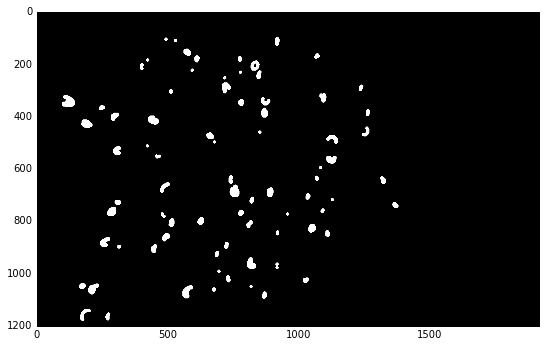

In [132]:
fig = plt.figure(figsize=(9, 9))
im_bw = cv2.imread('../data/frame0002_bw.png', cv2.IMREAD_GRAYSCALE)
im_pos = cv2.imread('../data/frame0002_positive.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(im_pos, cmap=plt.cm.gray)

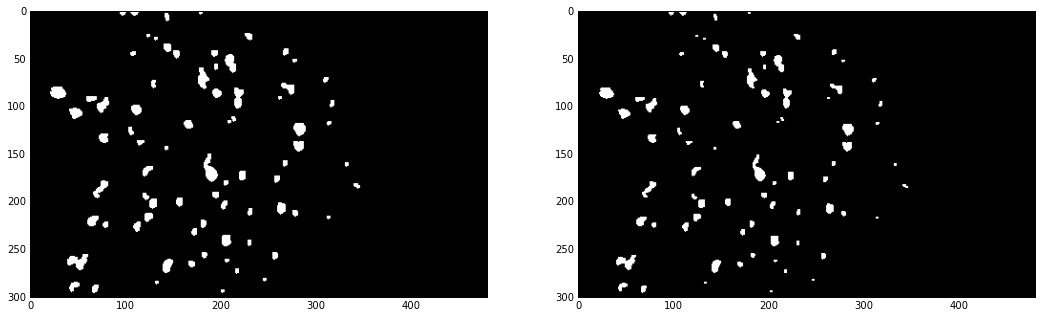

In [137]:
fig = plt.figure(figsize=(18, 9))

n = 3
kernel_square = np.ones((n, n), np.uint8)
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (n, n))
bw_open = cv2.morphologyEx(im_bw, cv2.MORPH_OPEN, kernel_test)

ax = fig.add_subplot(121)
ax.imshow(bw_open, cmap=plt.cm.gray)

# Maybe do another erosion to split connected blobs?
kernal_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1))
bw_erosion = cv2.erode(bw_open, k, iterations=1)

ax = fig.add_subplot(122)
plt.imshow(bw_erosion, cmap=plt.cm.gray)

# For now we use bw_open
bw = bw_open

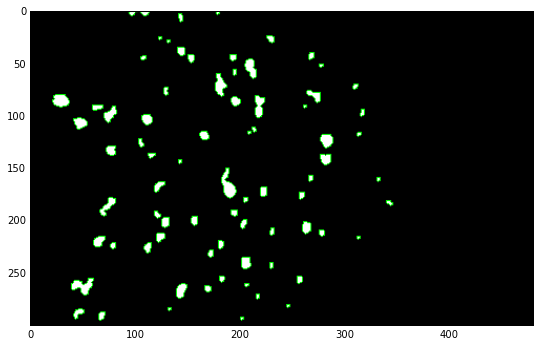

In [138]:
# Find contours
# Make a copy of bw because findCountours modifies input
bw_copy = np.array(bw_open, dtype=np.uint8, copy=True)

# We use EXTERNAL, because we want to fill all the holes
cs, _ = cv2.findContours(bw_copy, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours to visualize it
color = cv2.cvtColor(bw_open, cv2.COLOR_GRAY2BGR)
cv2.drawContours(color, cs, -1, color=(0,255,0), thickness=1)
fig = plt.figure(figsize=(9,9))
plt.imshow(color)

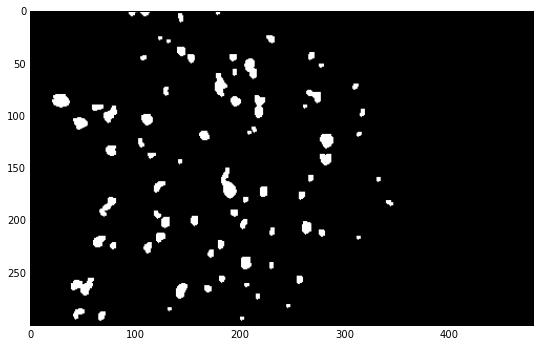

In [139]:
# Now we redraw the contour on a grayscale image to have the filled version
# Notice all holes are filed
filled = np.zeros_like(bw)
cv2.drawContours(filled, cs, -1, color=255, thickness=-1)
filled_mask = (filled == 255)
fig = plt.figure(figsize=(9,9))
plt.imshow(filled, cmap=plt.cm.gray)

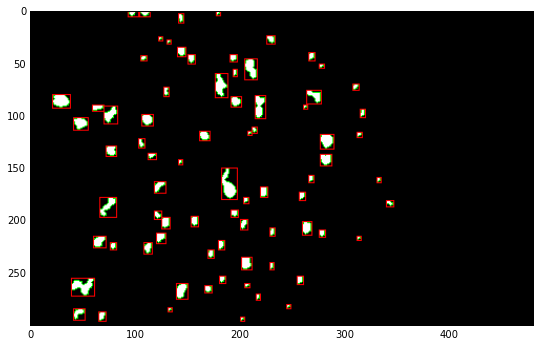

In [140]:
for cnt in cs:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(color, (x, y), (x + w, y + h), color=(255,0,0), thickness=1)
fig = plt.figure(figsize=(9,9))
plt.imshow(color)

In [143]:
# Some other parameters that can be found in matlab regionprops
# Don't know if we need them, lets see
# http://stackoverflow.com/questions/9056646/python-opencv-find-black-areas-in-a-binary-image
# filled_area: number of pixels filled
filled_area = np.sum(filled_mask)
print('filled area: {0}'.format(filled_area))

filled area: 4530


In [144]:
# pixel idx list
pixel_idx_list = filled_mask.nonzero()
print(pixel_idx_list)

(array([  1,   1,   1, ..., 295, 295, 295]), array([ 93,  94,  95, ...,  66,  67, 201]))
